# Preprosesamiento

## Librerias

In [15]:
# Instalación de librerias

import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport

import re, string, unicodedata
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

from tqdm import tqdm

import nltk

from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn import tree

## Preparación de datos

In [16]:
# Leer archivo de datos con texto normalizado

data_normalized_text = pd.read_csv('DatosSuicidio/DatosTextoNormalizado.csv', sep=',', encoding = 'utf-8', index_col = 0)

data_normalized_text.head()

,id,text,class,words
0,173271,want destroy myselffor everyth start feel okay...,suicide,"['want', 'destroy', 'myselffor', 'everyth', 's..."
1,336321,kind got behind schedul learn next week testwe...,non-suicide,"['kind', 'got', 'behind', 'schedul', 'learn', ..."
2,256637,sure anymorefirst foremost brazil judg second ...,suicide,"['sure', 'anymorefirst', 'foremost', 'brazil',..."
3,303772,pleas give reason livethat much reason live li...,suicide,"['pleas', 'give', 'reason', 'livethat', 'much'..."
4,293747,27f struggl find mean move forwardi admit bit ...,suicide,"['27f', 'struggl', 'find', 'mean', 'move', 'fo..."


In [17]:
data_normalized_text = data_normalized_text.dropna()

In [18]:
data_normalized_text['words'] = data_normalized_text['words'].apply(literal_eval)
data_normalized_text.head()

,id,text,class,words
0,173271,want destroy myselffor everyth start feel okay...,suicide,"[want, destroy, myselffor, everyth, start, fee..."
1,336321,kind got behind schedul learn next week testwe...,non-suicide,"[kind, got, behind, schedul, learn, next, week..."
2,256637,sure anymorefirst foremost brazil judg second ...,suicide,"[sure, anymorefirst, foremost, brazil, judg, s..."
3,303772,pleas give reason livethat much reason live li...,suicide,"[pleas, give, reason, livethat, much, reason, ..."
4,293747,27f struggl find mean move forwardi admit bit ...,suicide,"[27f, struggl, find, mean, move, forwardi, adm..."


In [19]:
X_data, y_data = data_normalized_text['text'],data_normalized_text['class']
y_data = (y_data == 'suicide').astype(int)
y_data

0         1
1         0
2         1
3         1
4         1
         ..
195695    0
195696    0
195697    0
195698    0
195699    1
Name: class, Length: 195668, dtype: int64

In [20]:
tfidf = TfidfVectorizer(min_df = 10, max_df =0.5)
X_tf_idf = tfidf.fit_transform(X_data)
print(X_tf_idf.shape)

(195668, 25662)


In [21]:
tfidf.vocabulary_

{'want': 24816,
 'destroy': 6493,
 'myselffor': 15077,
 'everyth': 8278,
 'start': 21530,
 'feel': 8869,
 'okay': 15846,
 'came': 3806,
 'tumbl': 23492,
 'know': 13013,
 'use': 24327,
 'cope': 5320,
 'reason': 18403,
 'tear': 22484,
 'skin': 20684,
 'shred': 20449,
 'swallow': 22231,
 'everi': 8260,
 'pill': 16965,
 'find': 9042,
 'right': 19285,
 'alon': 1529,
 'room': 19421,
 'wall': 24784,
 'slowli': 20811,
 'fall': 8697,
 'matter': 14137,
 'time': 22919,
 'snap': 20896,
 'final': 9026,
 'end': 7921,
 'everything': 8280,
 'starting': 21533,
 'tumbling': 23494,
 'used': 24328,
 'tearing': 22488,
 'swallowing': 22233,
 'every': 8268,
 'alone': 1530,
 'slowly': 20812,
 'falling': 8703,
 'finally': 9032,
 'kind': 12956,
 'got': 10186,
 'behind': 2863,
 'schedul': 19774,
 'learn': 13210,
 'next': 15354,
 'week': 24965,
 'eight': 7683,
 'test': 22630,
 'four': 9447,
 'alreadi': 1547,
 'studi': 21841,
 'two': 23562,
 'good': 10137,
 'minim': 14550,
 'anyth': 1900,
 'yet': 25548,
 'still': 

# Random Forest

## Librerias

In [22]:
# Librerías para manejo de datos

import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier

In [23]:
%matplotlib inline
plt.close('all')

## Modelamiento

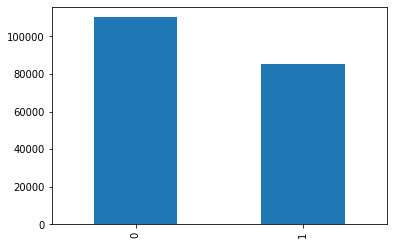

In [24]:
y_data.value_counts()
y_data.value_counts().plot(kind='bar')

In [25]:
# Aplicar tecnica de smote para valanciar la variable objetivo

sm = SMOTE(random_state=0)

X_sm, Y_sm = sm.fit_resample(X_tf_idf,y_data)

Shape of X before SMOTE: (195668, 25662)
Hape of X after SMOTE: (220282, 25662)

Balance of positive and negative classes (%):


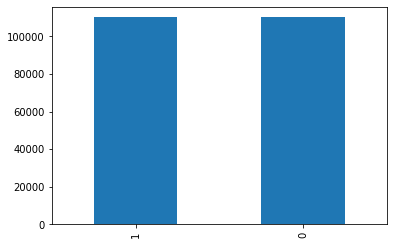

In [26]:
print(f'''Shape of X before SMOTE: {X_tf_idf.shape}
Hape of X after SMOTE: {X_sm.shape}''')
print("\nBalance of positive and negative classes (%):")
Y_sm.value_counts(normalize=True)*100

Y_sm.value_counts().plot(kind='bar')

In [27]:
# Dividir datos en entrenamiento (80%) y test (20%)

X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=0)

In [28]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
# Train the model on training data
rf.fit(X_train, Y_train);

In [29]:
y_pred = rf.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.91
Recall: 0.9311972406281201
Precisión: 0.8960607913354878
Puntuación F1: 0.9132911955844387


In [30]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     22023
           1       0.90      0.93      0.91     22034

    accuracy                           0.91     44057
   macro avg       0.91      0.91      0.91     44057
weighted avg       0.91      0.91      0.91     44057



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


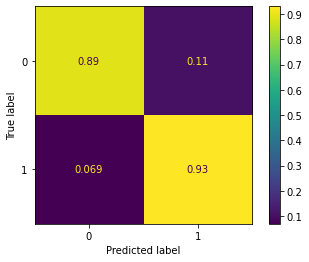

In [31]:
plot_confusion_matrix(rf, X_test, Y_test,normalize='true')  

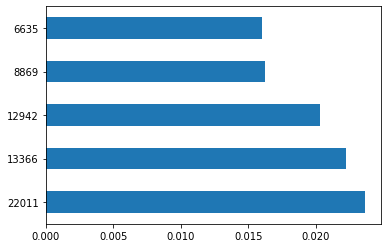

In [35]:
feat_importances = pd.Series(rf.feature_importances_)
feat_importances.nlargest(5).plot(kind='barh')

6635 = die

8869 = feel

12942 = kill

13366 = life

22011 = suicid